### Random Forests

#### Introduction
Random Forest is an ensemble learning method used for classification and regression tasks. It operates by constructing multiple decision trees during training and outputs the class (classification) or mean prediction (regression) from all the trees.

#### How It Works
1. **Bootstrapping (Bagging)**: 
   - The algorithm randomly selects subsets of the training data with replacement (bootstrap sampling).
   - Multiple decision trees are trained on different subsets of the data.

2. **Feature Randomness**:
   - At each split in a tree, a random subset of features is considered instead of all features.
   - This helps in reducing correlation among trees, making the model more robust.

3. **Majority Voting / Averaging**:
   - For classification: Each tree makes a prediction, and the most common class is chosen (majority voting).
   - For regression: The predictions from all trees are averaged to get the final result.

#### Advantages
- Reduces overfitting compared to a single decision tree.
- Works well with large datasets and high-dimensional data.
- Handles missing values effectively.
- Can handle both classification and regression tasks.

#### Disadvantages
- Requires more computational resources compared to a single decision tree.
- Can be less interpretable than a single decision tree.

#### Hyperparameters
Some key hyperparameters to tune in Random Forests:
- `n_estimators`: Number of trees in the forest.
- `max_depth`: Maximum depth of each tree.
- `min_samples_split`: Minimum samples required to split a node.
- `min_samples_leaf`: Minimum samples required at a leaf node.
- `max_features`: Number of features to consider for each split.




In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [6]:
# Load dataset
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [7]:
# Split data into features and label
X = data.data
y = data.target

In [ ]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# n_estimators = 100 -> 100 decision trees

In [10]:
# train classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
# Make predictions
predictions = rf_classifier.predict(X_test)

In [13]:
# Evaluate the classifier
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print(f"The accuracy of the model: {accuracy}")

The accuracy of the model: 0.9649122807017544


In [14]:
# Get feature importances
importances = rf_classifier.feature_importances_
importances

array([0.04870337, 0.01359088, 0.05326975, 0.04755501, 0.00728533,
       0.01394433, 0.06800084, 0.10620999, 0.00377029, 0.00388577,
       0.02013892, 0.00472399, 0.01130301, 0.02240696, 0.00427091,
       0.00525322, 0.00938583, 0.00351326, 0.00401842, 0.00532146,
       0.07798688, 0.02174901, 0.06711483, 0.15389236, 0.01064421,
       0.02026604, 0.0318016 , 0.14466327, 0.01012018, 0.00521012])

In [15]:
# Sort feature importances in descending order
indices = np.argsort(importances[::-1])
indices


array([12, 21, 20, 11, 15, 18,  0, 14, 10, 25, 13,  1,  5, 17, 28, 24, 19,
        4,  8, 16,  3, 26, 29, 27,  7, 23,  9, 22,  2,  6])

In [16]:
# rearrange features names to match the sorted feature importances
feature_names = data.feature_names[indices]
feature_names

array(['perimeter error', 'worst texture', 'worst radius',
       'texture error', 'compactness error', 'symmetry error',
       'mean radius', 'smoothness error', 'radius error',
       'worst compactness', 'area error', 'mean texture',
       'mean compactness', 'concave points error', 'worst symmetry',
       'worst smoothness', 'fractal dimension error', 'mean smoothness',
       'mean symmetry', 'concavity error', 'mean area', 'worst concavity',
       'worst fractal dimension', 'worst concave points',
       'mean concave points', 'worst area', 'mean fractal dimension',
       'worst perimeter', 'mean perimeter', 'mean concavity'],
      dtype='<U23')

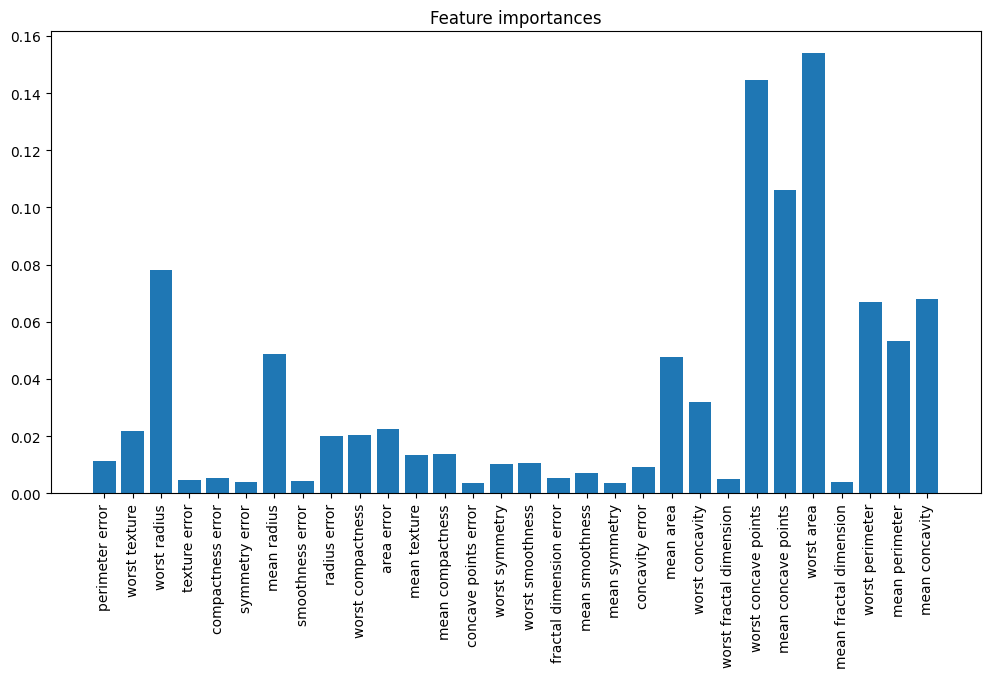

In [18]:
# Bar plot to visualize feature importances
plt.figure(figsize=(12,6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names, rotation= 90)
plt.show()